                                                **Analysis Flow**
**1. EDA and FE**
1. Data Profiling
2. Stastical analysis
3. Graphical Analysis
4. Data Cleaning
5. Data Scaling
6. Outlier Trimming
**2. Logistic Regression (Classification) Models**
1. Logistic Regression
2. Performance metrics for above model

**Dataset: https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv**

**Importing Dataset**

In [169]:
import pandas as pd
import numpy as np
### Visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### To ignore warnings
import warnings
warnings.filterwarnings('ignore')
### Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, fbeta_score
### To be able to see maximum columns on screen
pd.set_option('display.max_columns', 500)

In [170]:
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv")

In [171]:
### exporting file to csv for future use
df.to_csv("diabetes.csv")

                                        **Statistical Analysis**

In [172]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [173]:
df.size

6912

In [174]:
df.shape

(768, 9)

In [175]:
df.describe().round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


                                    ***Checking Missing values***

In [177]:
miss_val = df.isnull().sum()
miss_val_percent = 100 * df.isnull().sum() /len(df)
miss_val_table = pd.concat([miss_val,miss_val_percent],axis = 1)
miss_val_table_new = miss_val_table.rename(columns = {0 : 'Missing Values count', 1 : '% of Total Values'})
miss_val_table_new.sort_values("Missing Values count")

,Missing Values count,% of Total Values
Pregnancies,0,0.0
Glucose,0,0.0
BloodPressure,0,0.0
SkinThickness,0,0.0
Insulin,0,0.0
BMI,0,0.0
DiabetesPedigreeFunction,0,0.0
Age,0,0.0
Outcome,0,0.0


In [178]:
for feature in df.columns:
    print("{} has {} no of unique categories".format(feature, df[feature].nunique()))

Pregnancies has 17 no of unique categories
Glucose has 136 no of unique categories
BloodPressure has 47 no of unique categories
SkinThickness has 51 no of unique categories
Insulin has 186 no of unique categories
BMI has 248 no of unique categories
DiabetesPedigreeFunction has 517 no of unique categories
Age has 52 no of unique categories
Outcome has 2 no of unique categories


                                    ** Graphical analysis **

** Distribution of Features**

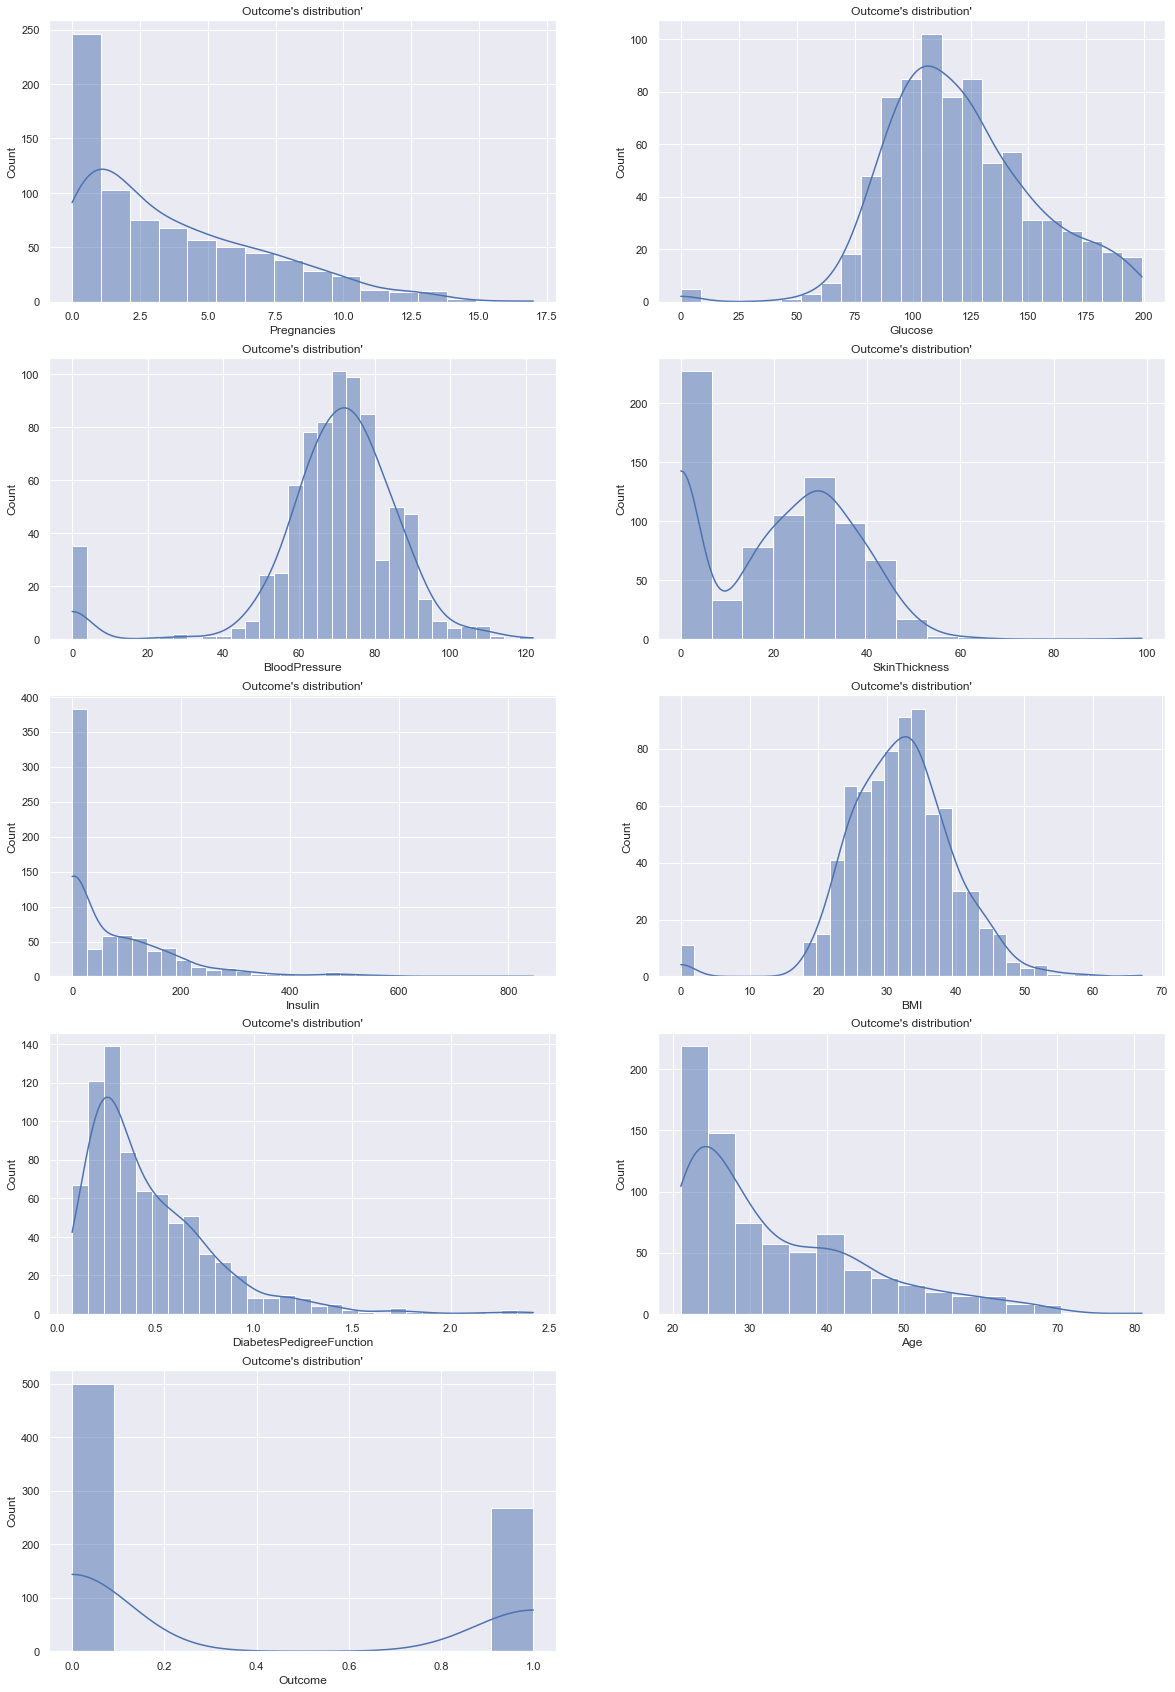

In [179]:
plt.figure (figsize = (20,30))
for i in enumerate(df.columns):
    plt.subplot(5,2,i[0]+1)
    sns.set(rc = {'figure.figsize' :(7,5)})
    sns.histplot(data =df,x = i[1],kde = True)
    plt.title("{}'s distribution'".format(feature))

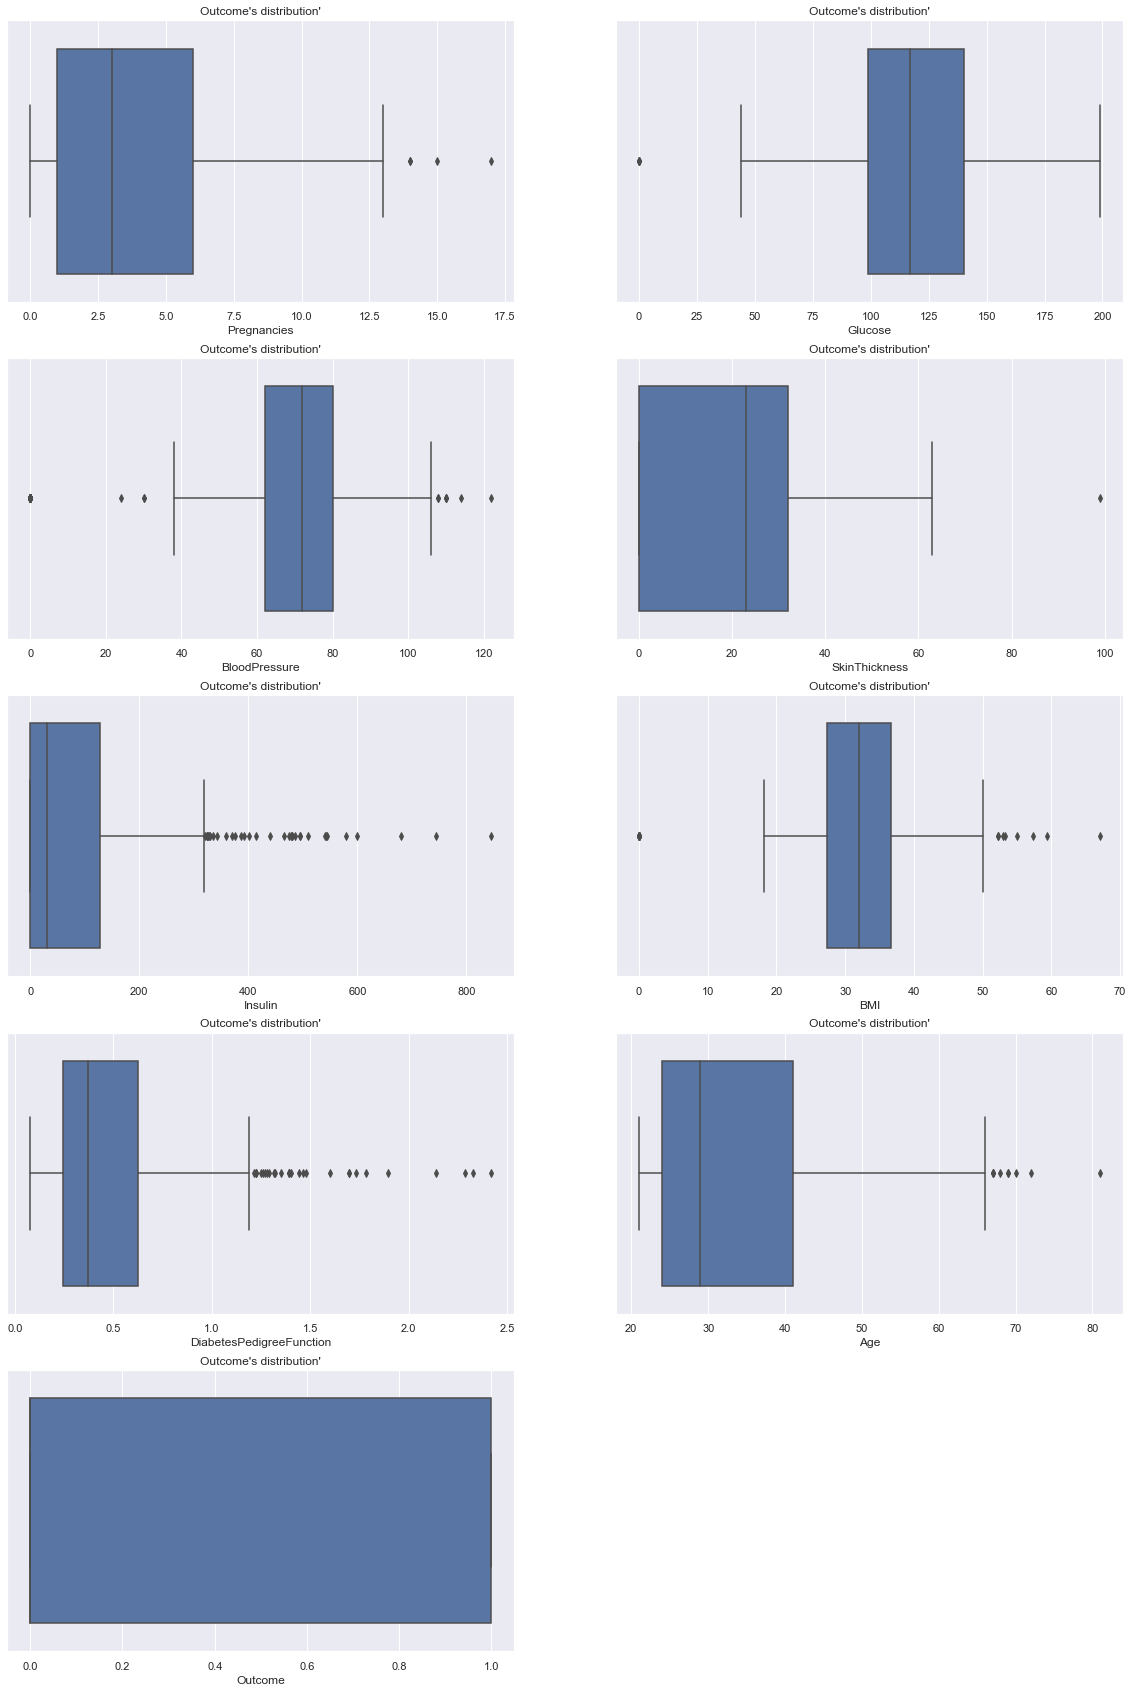

In [180]:
plt.figure (figsize = (20,30))
for i in enumerate(df.columns):
    plt.subplot(5,2,i[0]+1)
    sns.set(rc = {'figure.figsize' :(7,5)})
    sns.boxplot(data =df,x = i[1])
    plt.title("{}'s distribution'".format(feature))

#Features like Glucose, BloodPressure, SkinThickness, Insulin, BMI have many Zero values and can replace them by mean

***Replacing Zero values in mean and rechecking the Distribution***

In [190]:
df_copy = df.copy()
df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [191]:
### Replacing zero values in feature with mean values of that feature

for feature in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    df_copy[feature]=df_copy[feature].replace(0,df_copy[feature].mean())

In [192]:
df_copy

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


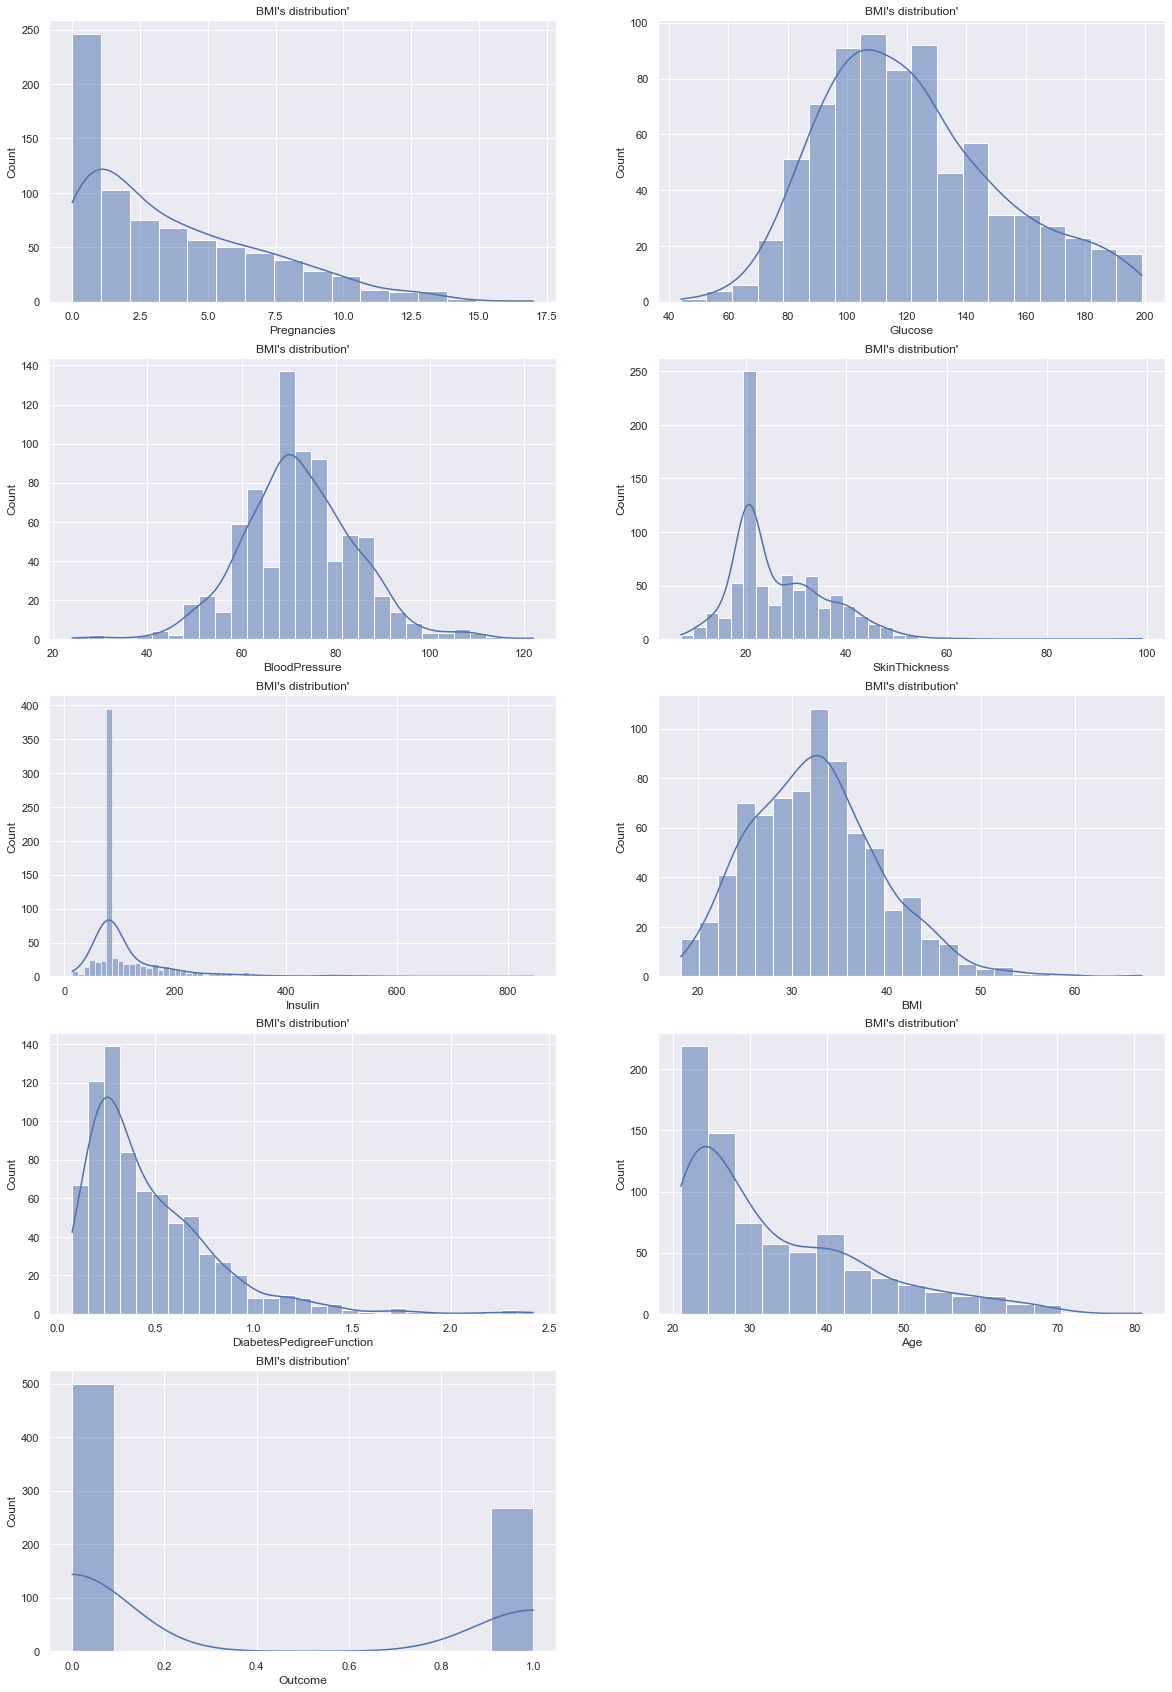

In [193]:
plt.figure (figsize = (20,30))
for i in enumerate(df.columns):
    plt.subplot(5,2,i[0]+1)
    sns.set(rc = {'figure.figsize' :(7,5)})
    sns.histplot(data =df_copy,x = i[1],kde = True)
    plt.title("{}'s distribution'".format(feature))

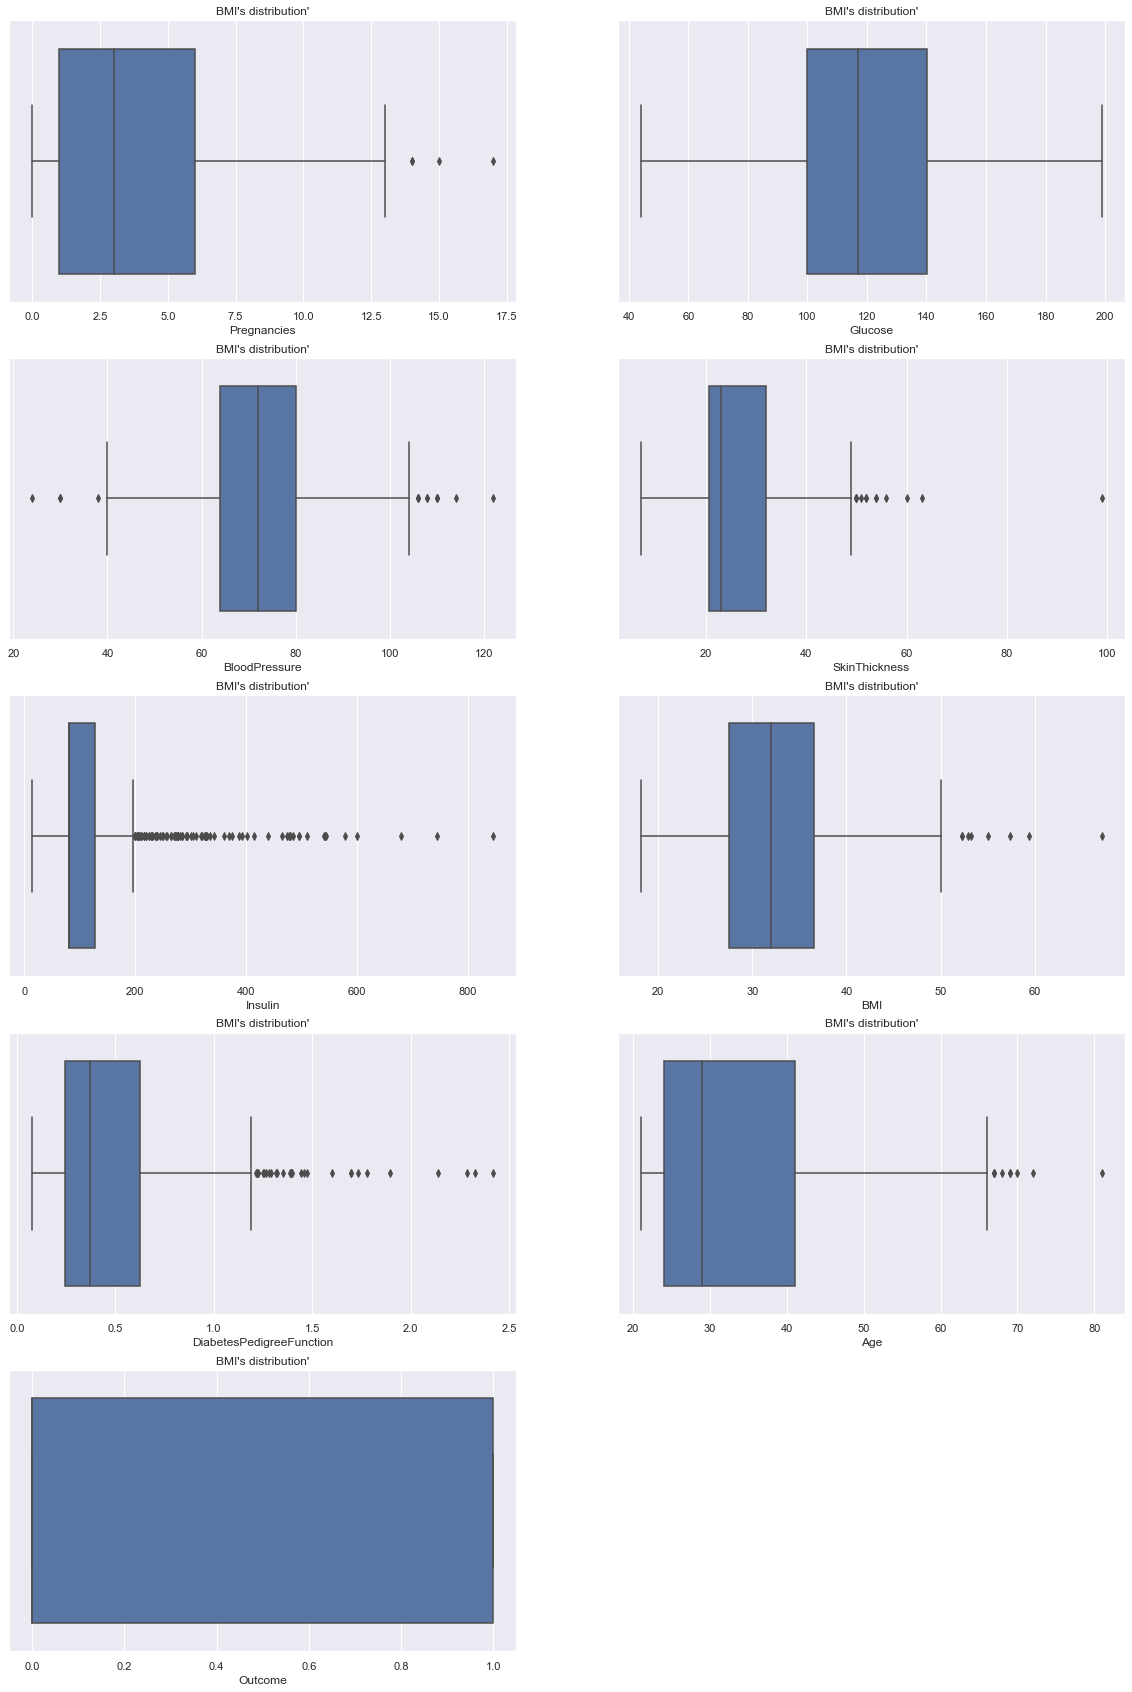

In [194]:
plt.figure (figsize = (20,30))
for i in enumerate(df.columns):
    plt.subplot(5,2,i[0]+1)
    sns.set(rc = {'figure.figsize' :(7,5)})
    sns.boxplot(data =df_copy,x = i[1])
    plt.title("{}'s distribution'".format(feature))

In [195]:
### Getting independent features
independent_features=[feature for feature in df.columns if feature not in ['Outcome']]
print(independent_features)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


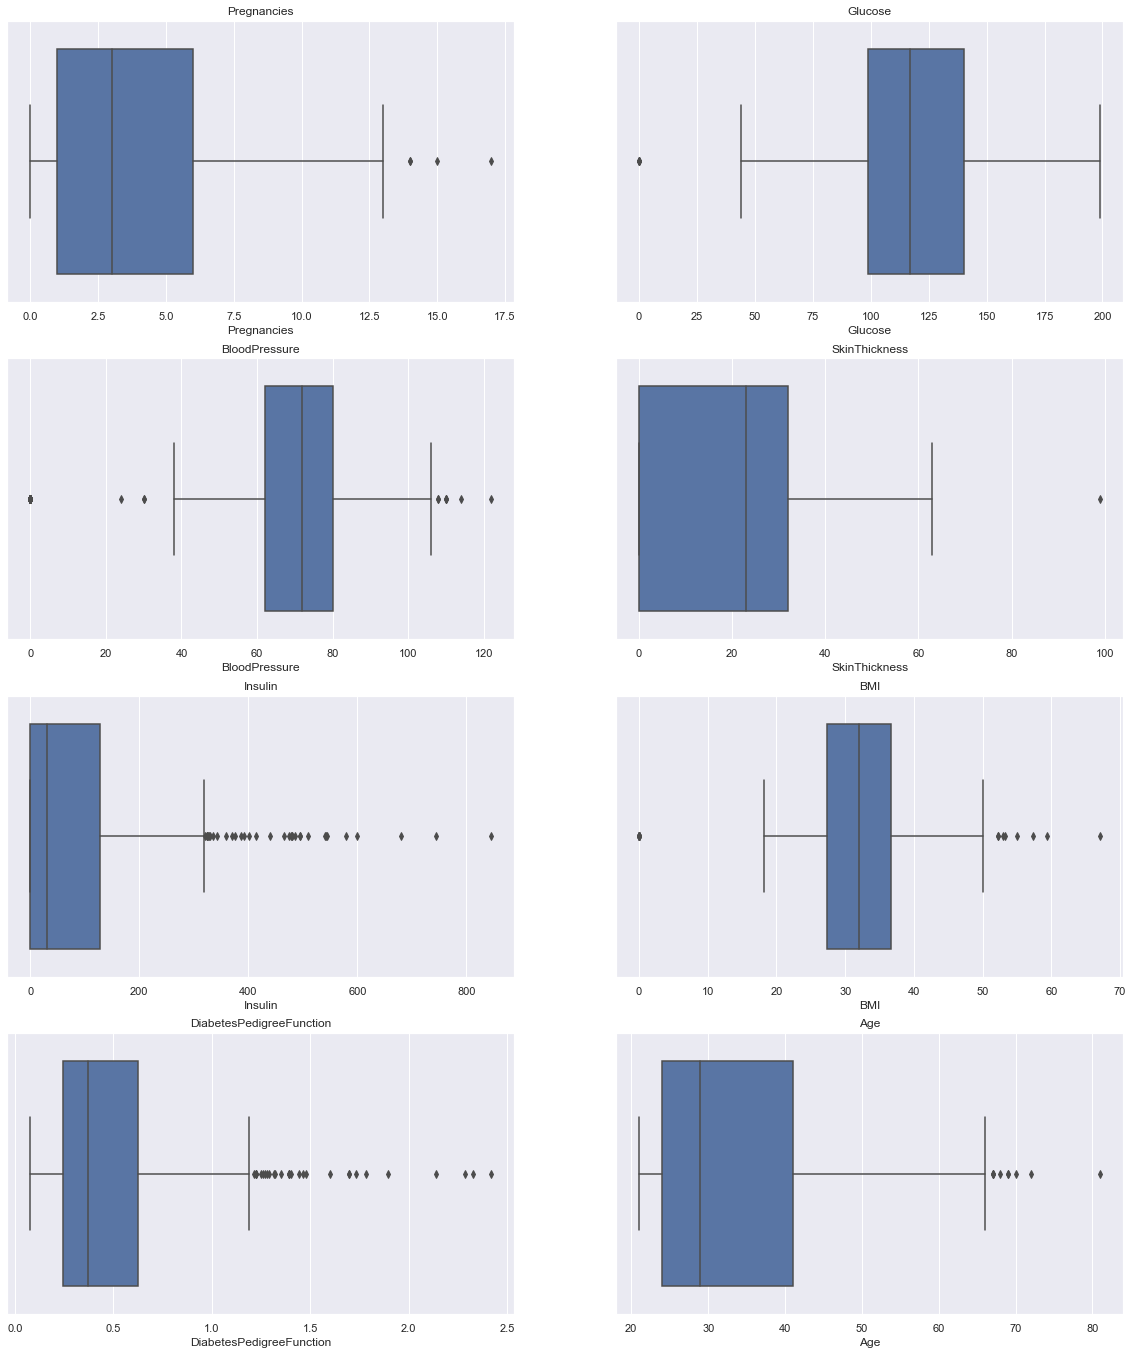

In [196]:
plt.figure(figsize=(20,30))
for i in enumerate(independent_features):
    plt.subplot(5, 2, i[0]+1)
    sns.set(rc={'figure.figsize':(7,5)})
    sns.boxplot(data=df, x=i[1])
    plt.title("{}".format(i[1]))


*** Outlier trimming***

In [197]:
def outlier_trimmer_upper(data_set, feature, trimming_value):
    threshold=data_set[feature].quantile(trimming_value/100)
    data_set=data_set[data_set[feature]<threshold]
    return data_set
    
def outlier_trimmer_lower(data_set, feature, trimming_value):
    threshold=data_set[feature].quantile(trimming_value/100)
    data_set=data_set[data_set[feature]>threshold]
    return data_set

In [198]:
### shape of data before trimming
df_copy.shape


(768, 9)

In [199]:
for feature in ['BloodPressure', 'SkinThickness', 'BMI', 'Age']:
    df_copy=outlier_trimmer_upper(df_copy, feature, 99)

In [200]:
### shape of data after trimming
df_copy.shape

(733, 9)

In [201]:
for feature in ['Insulin', 'DiabetesPedigreeFunction']:
    df_copy=outlier_trimmer_upper(df_copy, feature, 98)

In [202]:
### shape of data after trimming
df_copy.shape

(703, 9)

In [203]:
df_copy

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [204]:
for feature in ['Glucose', 'BloodPressure', 'BMI' ]:
    df_copy=outlier_trimmer_lower(df_copy, feature, 0.5)

In [205]:
### shape of data after trimming
df_copy.shape

(688, 9)

In [206]:
### Re-checking outliers after trimming outliers in independent features

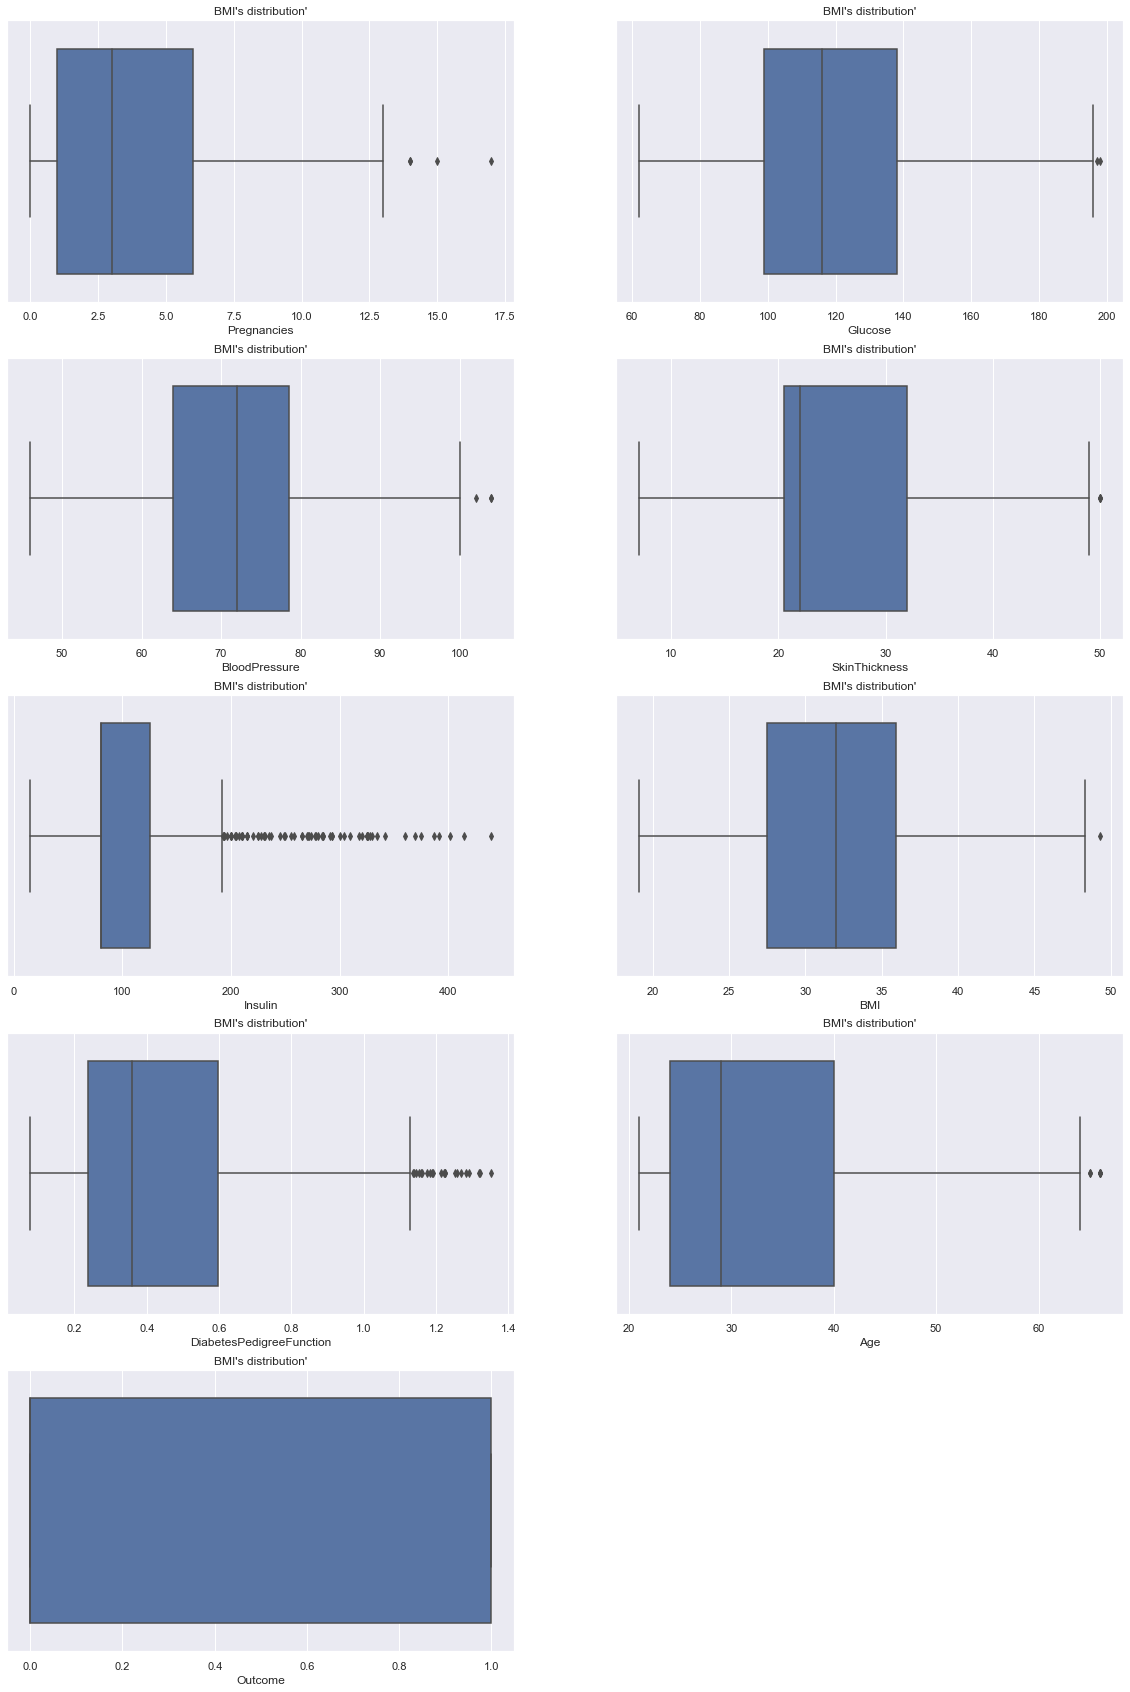

In [207]:
plt.figure (figsize = (20,30))
for i in enumerate(df.columns):
    plt.subplot(5,2,i[0]+1)
    sns.set(rc = {'figure.figsize' :(7,5)})
    sns.boxplot(data =df_copy,x = i[1])
    plt.title("{}'s distribution'".format(feature))

***Observations***
Post Trimming Outliers
1. BloodPressure has very few outliers on left sides of boundary
2. SkinThickness has no outliers
3. BMI and Age have very few outliers on upper boundary side
4. No of outliers is reduced for Insulin and DiabetesPedigreeFunction
5. Now no feature has outliers on lower side

                            ***Imbalance of data before and after trimming***  

<AxesSubplot:xlabel='Outcome', ylabel='count'>

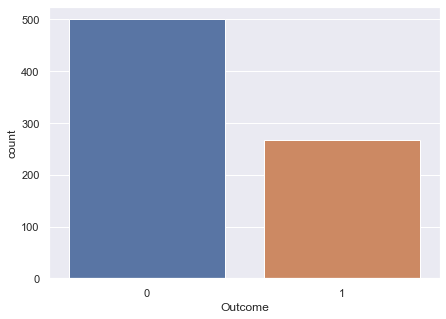

In [208]:
sns.countplot(data=df, x='Outcome')

<AxesSubplot:xlabel='Outcome', ylabel='count'>

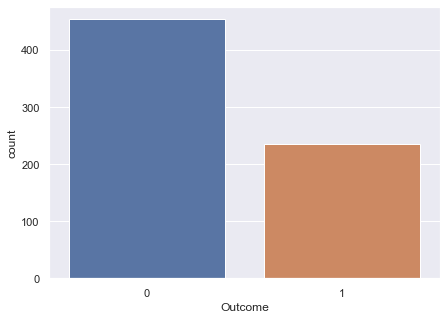

In [209]:
sns.countplot(data=df_copy, x='Outcome')

***Relationship between independent features and dependent feature***

In [210]:
independent_features=[feature for feature in df_copy.columns if feature not in ['Outcome']]
independent_features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

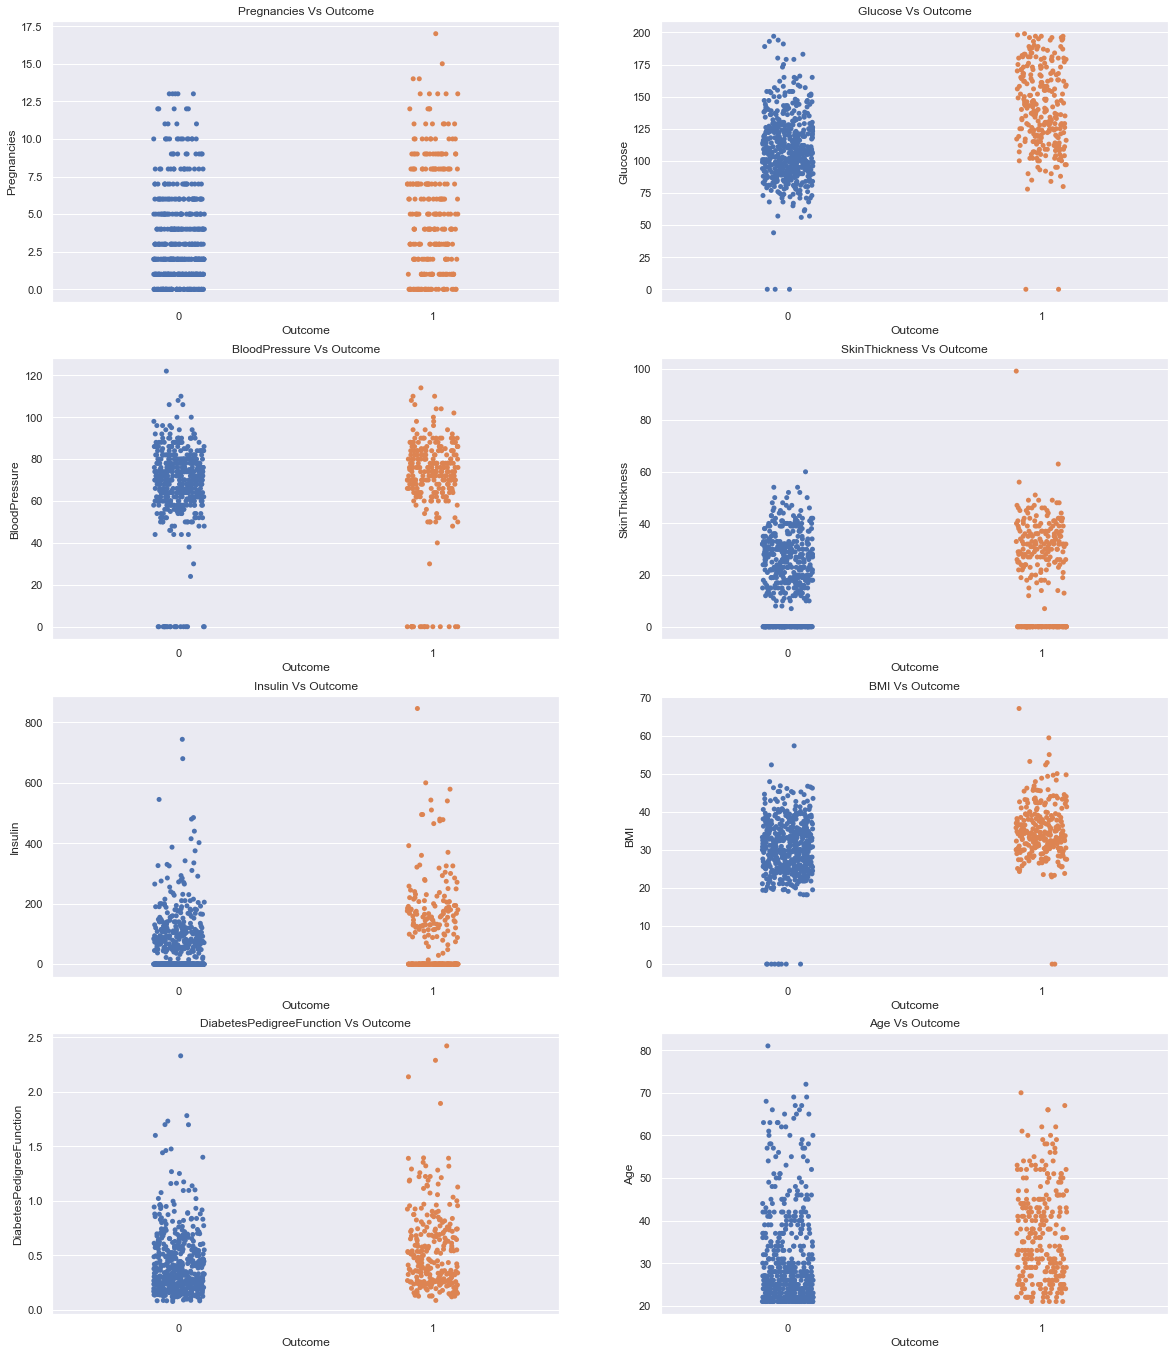

In [211]:
plt.figure(figsize=(20,30))
for i in enumerate(independent_features):
    plt.subplot(5, 2, i[0]+1)
    sns.set(rc={'figure.figsize':(7,5)})
    sns.stripplot(data=df, y=i[1], x='Outcome')
    plt.title("{} Vs Outcome".format(i[1]))


*Checking the variation of slope between independent features and dependent feature*

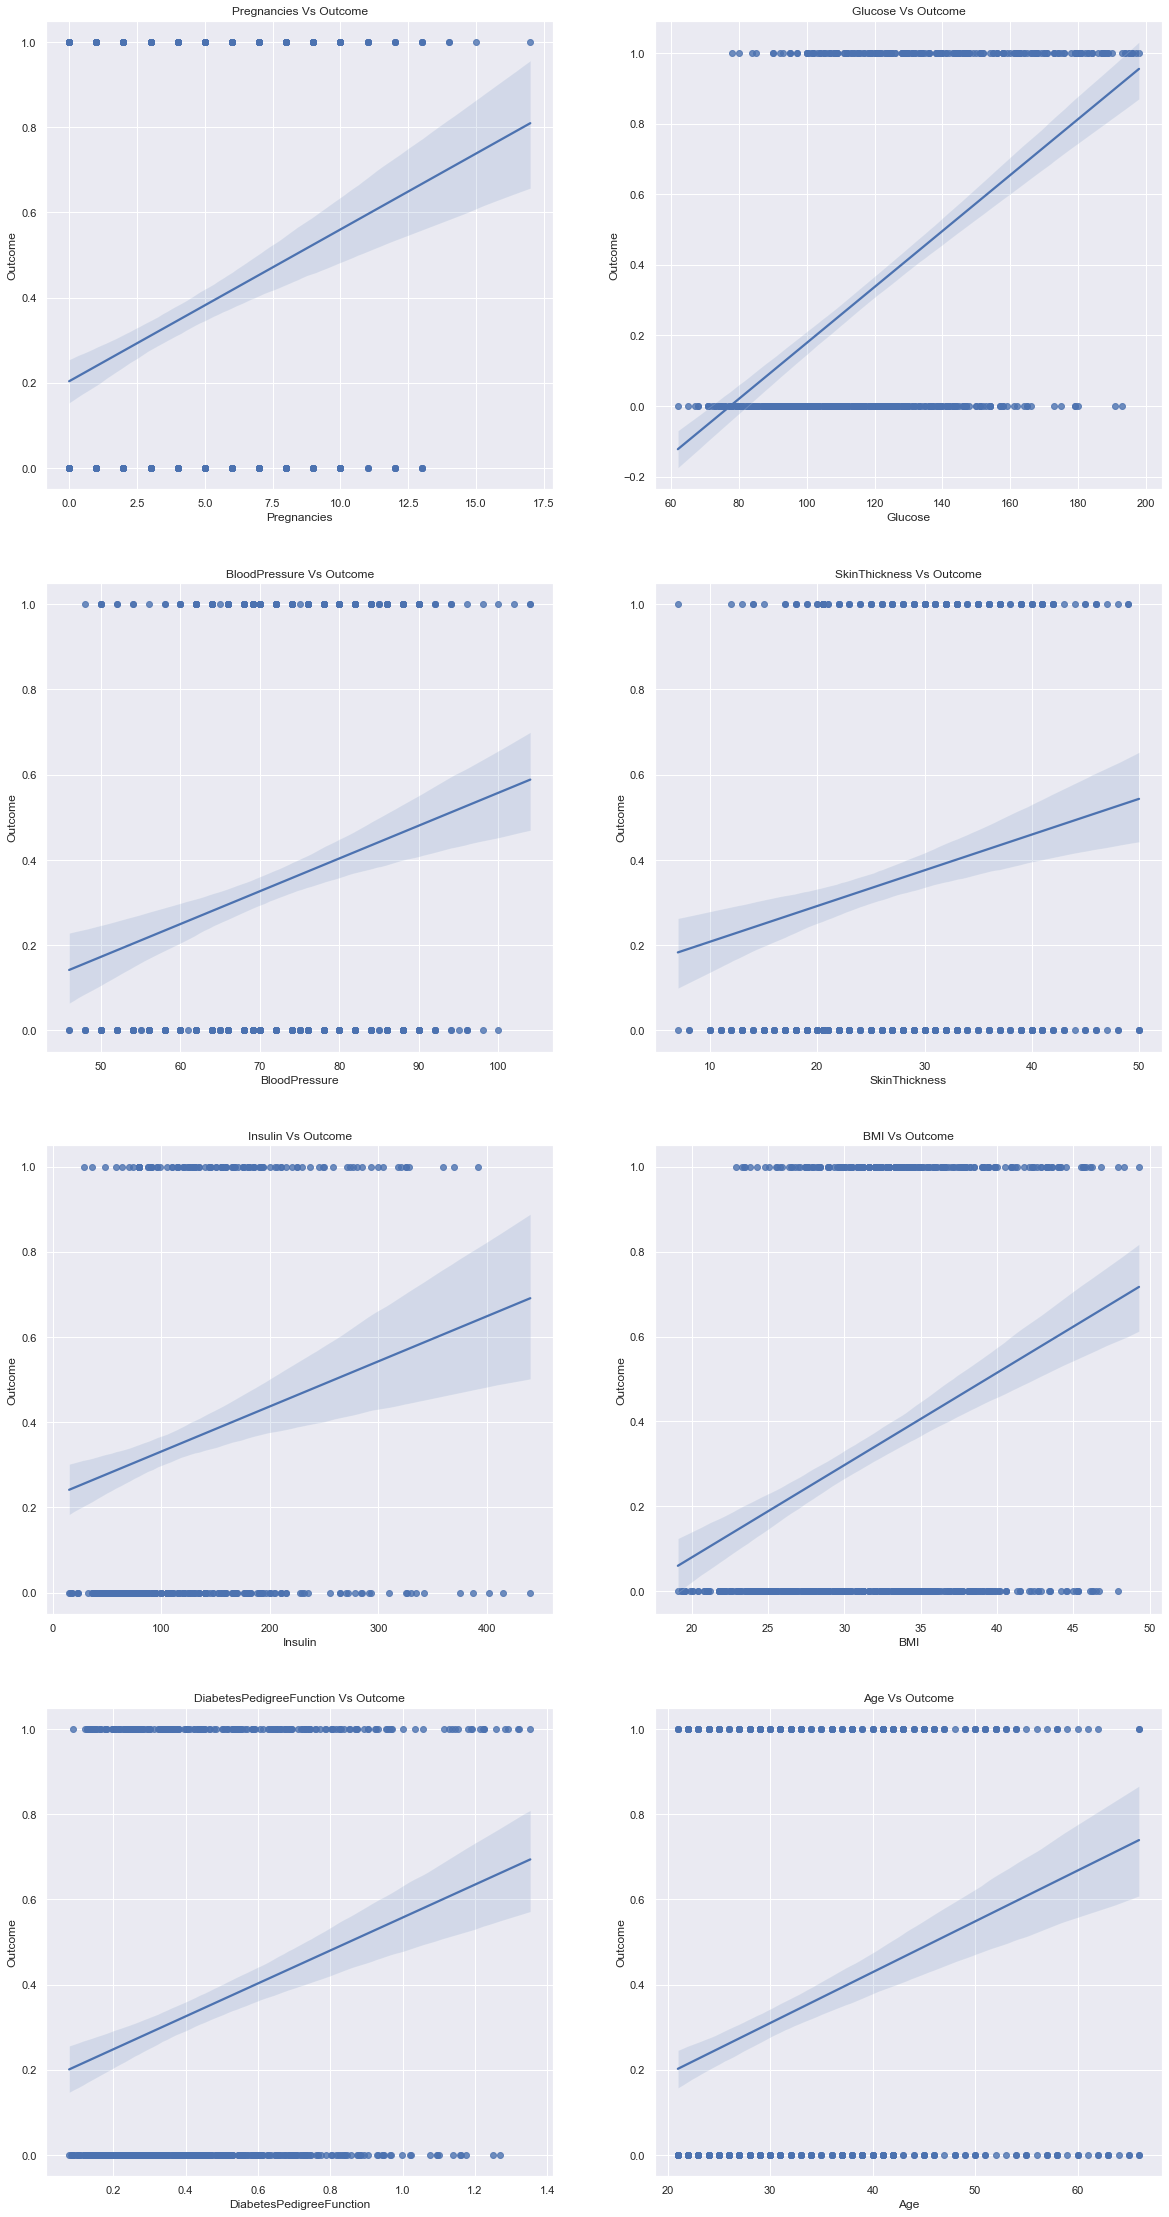

In [212]:
plt.figure(figsize=(20,50))
for i in enumerate(independent_features):
    plt.subplot(5, 2, i[0]+1)
    sns.set(rc={'figure.figsize':(8,10)})
    sns.regplot(x=df_copy[i[1]], y=df_copy['Outcome'])
    plt.xlabel(i[1])
    plt.ylabel("Outcome")
    plt.title("{} Vs Outcome".format(i[1]))

***Checking correlation between independent features and dependent feature***

In [213]:
corr=round(df_copy[[feature for feature in df_copy.columns]].corr(),2)
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.00,0.15,0.19,0.07,0.01,0.05,0.03,0.56,0.25
Glucose,0.15,1.00,0.21,0.10,0.38,0.19,0.09,0.30,0.49
BloodPressure,0.19,0.21,1.00,0.15,-0.00,0.27,0.05,0.35,0.17
SkinThickness,0.07,0.10,0.15,1.00,0.26,0.53,0.12,0.04,0.15
Insulin,0.01,0.38,-0.00,0.26,1.00,0.20,0.15,0.04,0.15
BMI,0.05,0.19,0.27,0.53,0.20,1.00,0.14,0.07,0.28
DiabetesPedigreeFunction,0.03,0.09,0.05,0.12,0.15,0.14,1.00,0.06,0.22
Age,0.56,0.30,0.35,0.04,0.04,0.07,0.06,1.00,0.28
Outcome,0.25,0.49,0.17,0.15,0.15,0.28,0.22,0.28,1.00


<AxesSubplot:>

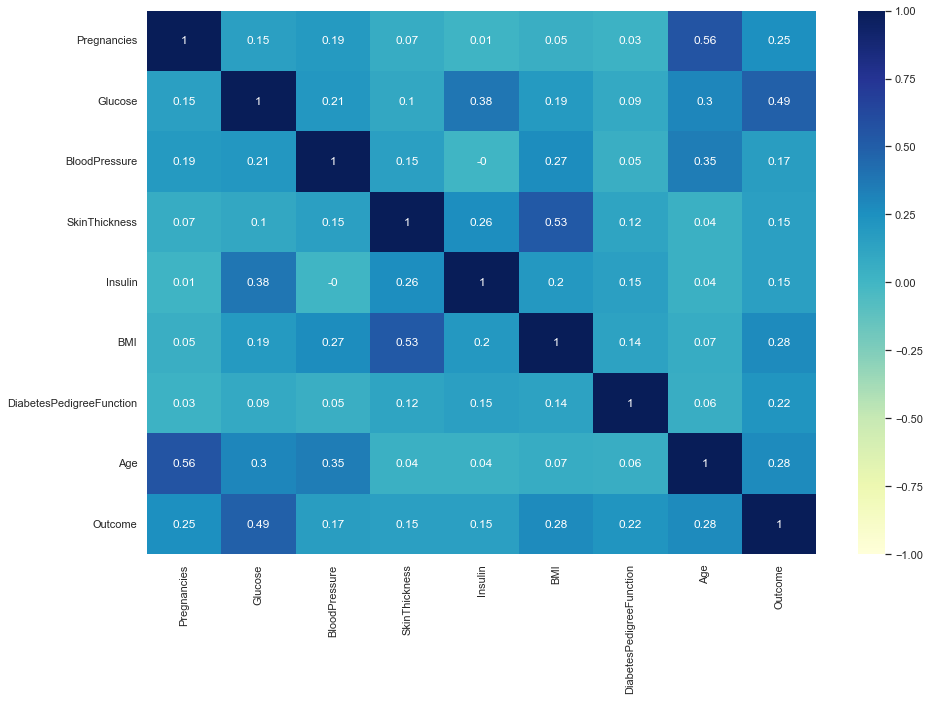

In [214]:
### Plotting heatmap for visualising the correlation between features
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data=corr, annot=True,cmap="YlGnBu", vmin=-1, vmax=1)

**Model Building**

In [215]:
df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0


In [216]:
df_copy.shape

(688, 9)

**Splitting Train and Test data**

In [217]:
X = df_copy.iloc[:,:-1]
y = df_copy.iloc[:,-1]

In [218]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30


In [219]:
y.head()

0    1
1    0
2    1
3    0
5    0
Name: Outcome, dtype: int64

In [223]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=16)

In [224]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
746,1,147.0,94.0,41.000000,79.799479,49.3,0.358,27
264,4,123.0,62.0,20.536458,79.799479,32.0,0.226,35
340,1,130.0,70.0,13.000000,105.000000,25.9,0.472,22
322,0,124.0,70.0,20.000000,79.799479,27.4,0.254,36
565,2,95.0,54.0,14.000000,88.000000,26.1,0.748,22
...,...,...,...,...,...,...,...,...
359,1,196.0,76.0,36.000000,249.000000,36.5,0.875,29
646,1,167.0,74.0,17.000000,144.000000,23.4,0.447,33
141,5,106.0,82.0,30.000000,79.799479,39.5,0.286,38
270,10,101.0,86.0,37.000000,79.799479,45.6,1.136,38


In [225]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
705,6,80.0,80.000000,36.000000,79.799479,39.800000,0.177,28
728,2,175.0,88.000000,20.536458,79.799479,22.900000,0.326,22
242,3,139.0,54.000000,20.536458,79.799479,25.600000,0.402,22
687,1,107.0,50.000000,19.000000,79.799479,28.300000,0.181,29
638,7,97.0,76.000000,32.000000,91.000000,40.900000,0.871,32
...,...,...,...,...,...,...,...,...
426,0,94.0,69.105469,20.536458,79.799479,31.992578,0.256,25
564,0,91.0,80.000000,20.536458,79.799479,32.400000,0.601,27
421,2,94.0,68.000000,18.000000,76.000000,26.000000,0.561,21
630,7,114.0,64.000000,20.536458,79.799479,27.400000,0.732,34


In [226]:
y_train

746    1
264    1
340    0
322    1
565    0
      ..
359    1
646    1
141    0
270    1
761    1
Name: Outcome, Length: 584, dtype: int64

In [227]:
y_test

705    0
728    0
242    1
687    0
638    1
      ..
426    0
564    0
421    0
630    1
19     1
Name: Outcome, Length: 104, dtype: int64

**Standardisation**

In [228]:
scaler=StandardScaler()
scaler

StandardScaler()

In [229]:
X_train=scaler.fit_transform(X_train)
X_train

array([[-0.86019009,  0.94854966,  2.01983918, ...,  2.89360233,
        -0.31591105, -0.51401632],
       [ 0.04169683,  0.1172319 , -0.91556073, ...,  0.016956  ,
        -0.79724224,  0.20241693],
       [-0.86019009,  0.35969958, -0.18171075, ..., -0.99735282,
         0.09978406, -0.9617871 ],
       ...,
       [ 0.3423258 , -0.47161818,  0.91906421, ...,  1.26405701,
        -0.57845534,  0.47107939],
       [ 1.84547065, -0.64480938,  1.2859892 , ...,  2.27836583,
         2.52102579,  0.47107939],
       [ 1.54484168,  1.74522918,  0.18521424, ...,  2.01231762,
        -0.15182088,  0.91885017]])

In [230]:
X_train[0]

array([-0.86019009,  0.94854966,  2.01983918,  1.7665245 , -0.43888175,
        2.89360233, -0.31591105, -0.51401632])

In [231]:
X_test=scaler.transform(X_test)
X_test

array([[ 6.42954768e-01, -1.37221242e+00,  7.35601720e-01,
         1.18101174e+00, -4.38881751e-01,  1.31394105e+00,
        -9.75918211e-01, -4.24462162e-01],
       [-5.59561115e-01,  1.91842038e+00,  1.46945170e+00,
        -6.29808456e-01, -4.38881751e-01, -1.49619322e+00,
        -4.32597403e-01, -9.61787095e-01],
       [-2.58932144e-01,  6.71443739e-01, -1.64941070e+00,
        -6.29808456e-01, -4.38881751e-01, -1.04723686e+00,
        -1.55467326e-01, -9.61787095e-01],
       [-8.60190086e-01, -4.36979943e-01, -2.01633569e+00,
        -8.09731648e-01, -4.38881751e-01, -5.98280493e-01,
        -9.61332418e-01, -3.34908006e-01],
       [ 9.43583739e-01, -7.83362343e-01,  3.68676732e-01,
         7.12601531e-01, -2.66275971e-01,  1.49684920e+00,
         1.55471696e+00, -6.62455397e-02],
       [-1.16081906e+00, -6.44809383e-01, -7.32098232e-01,
        -1.04393675e+00, -4.38881751e-01, -1.81212547e+00,
        -7.02434583e-01, -1.05134125e+00],
       [ 1.24421271e+00,  1.087102

**Model - Logisitic Regression**

**Fitting the model**

In [232]:
logistic_reg = LogisticRegression()
logistic_reg 

LogisticRegression()

In [233]:
logistic_reg.fit(X_train,y_train)

LogisticRegression()

**Predicting**

In [236]:
logistic_reg_pred=logistic_reg.predict(X_test)
logistic_reg_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

**Performance Matrix**

In [237]:
confusion_mat=confusion_matrix(y_test, logistic_reg_pred)
confusion_mat

array([[56,  8],
       [16, 24]], dtype=int64)

In [240]:

truly_positive=confusion_mat[0][0]
falsely_positive=confusion_mat[0][1]
falsely_negative=confusion_mat[1][0]
truly_negative=confusion_mat[1][1]


In [238]:
accuracy=round(accuracy_score(y_test, logistic_reg_pred),4)
accuracy

0.7692

In [241]:

precision_manual_diabetic=round(truly_positive/(truly_positive+falsely_positive),4)
print("Precision of our model is {}".format(precision_manual_diabetic))


Precision of our model is 0.875


In [242]:
recall_manual_diabetic=round(truly_positive/(truly_positive+falsely_negative),4)
print("Recall of our model is {}".format(recall_manual_diabetic))


Recall of our model is 0.7778


In [243]:
f1_score=2*(precision_manual_diabetic*recall_manual_diabetic)/(precision_manual_diabetic+recall_manual_diabetic)
print("F-1 Score of our model is {} ".format(round(f1_score,4)))

F-1 Score of our model is 0.8235 
